<div style="width: 90%; margin: auto; background-color: black; padding: 20px; border-radius: 0 12px 12px 12px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.3); color: #ffffff; text-align: center; font-style: italic;" markdown="1">
    <span style="font-style: ; font-size: 40px; font-weight: bold; ">  MACHINE LEARNING PROJECT</span>
</div>


<div style="width: 70%; margin: auto; background-color: #e74c3c; padding: 20px; color: #dddd; text-align: center; font-style: italic;" markdown="1">
    <span style="font-style: Arial; font-size: 40px; font-weight: bold; "> Exploratory Data Analysis</span>
</div>




## objectif :
#### - comprendre du mieux possible nos donnees 
#### - Developper une premiere strategie de modelisation 

<div style="width: 90%; margin: auto; padding: 10px; background-color: #ecf0f1; border-radius: 0 12px 12px 12px; text-align: center; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.3);" markdown="1">
    <h2 style="color: darkblue; font-size: 30px"><strong>Breakdown of this notebook:</strong></h2>
</div>

<div style="width: 90%; margin: auto; background-color: #ecf0f1; border-radius: 0 12px 12px 12px; text-align: left; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.3);"  markdown="1">
<ol style="color: blue; font-size: 15px ;  font-weight: bold; margin: 20px;">
    <li>DATA OVERVIEW:
        <ul>
            <li>Importation des  Libraries</li>
            <li>impotation de la dataset</li>
            <li> Analyse de la forme des donnees</li>
     </ul>
    <li>Data Visualization:
        <ul>
            <li> Nettoyage des donnees</li>
            <li> Relations entre the variables </li>
            <li>Correlation entre differents variables.</li>
            <li> Clusterisation des donnes </li>
      </ul>
    <li>BULDING CLASSIFICATION MODELS: 
        <ul>
            <li>Random Forest Regression</li>
            <li>Decision Tree Regression</li>
            <li>Autres model de classification</li> 
        </ul>
        
    
</ol>
</div>

#  Description de la Dataset
Cette dataset rassemble des données de signaux biologiques élémentaires liées à la santé.
L'objectif est de <strong> déterminer la présence ou l'absence de tabagisme à partir de ces signaux biologiques </strong>.
Il s'agit d'identifier, à partir des signaux biologiques, <strong>si une personne fume ou non</strong>.

<div style="width: 90%; margin: auto; background-color: #274d3e; padding: 20px; border-radius: 0 12px 12px 12px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.3); color: #ffffff; text-align: center; font-style: italic;" markdown="1">
    <span style="font-style: italic; font-size: 30px; font-weight: bold; ">DATA OVERVIEW</span>
</div>

   ## importation des librairies

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.impute import SimpleImputer

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder # for encoding
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


 ## importons notre Dataset

In [63]:
df1 = pd.read_csv('smoking.csv')
df = df1.copy()
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


 ## Analyse de la forme des donnees 

In [64]:
# Dimension de la Dataset
df.shape

(55692, 27)

La dataset contient 55692 lignes et  27 colones, ce qui respecte les contraintes du projet

In [65]:
# les colones de la dataset et la variable target
df.columns.unique()

Index(['ID', 'gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'oral', 'dental caries',
       'tartar', 'smoking'],
      dtype='object')

In [66]:
#information generale sur les donnees 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

En analysant les colones on retrouve la variable target: <strong>"smoking"</strong>

In [67]:
# identification des types de variables 
df.dtypes.value_counts()

float64    18
int64       6
object      3
Name: count, dtype: int64

La dataset contient 18 variables de types ,<strong>float </strong>, 6 de type  <strong> int </strong> et 3 de type <strong>object</strong>

In [68]:
# description statistique
df.describe()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,...,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,27845.500000,44.182917,164.649321,65.864936,82.046418,1.012623,1.007443,1.025587,1.026144,121.494218,...,57.290347,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201,0.213334,0.367288
std,16077.039933,12.071418,9.194597,12.820306,9.274223,0.486873,0.485964,0.157902,0.159564,13.675989,...,14.738963,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539,0.409665,0.482070
min,0.000000,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000,0.000000
25%,13922.750000,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,...,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,27845.500000,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,0.000000
75%,41768.250000,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,0.000000,1.000000
max,55691.000000,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,240.000000,...,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000,1.000000


In [69]:
# identification des features numeriques et categoriel

numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes('object').columns.tolist()

In [70]:
df[categorical_cols].nunique()

gender    2
oral      1
tartar    2
dtype: int64

 Les variables categorielles sont : <strong>"gender", "oral", "tartar" </strong>

In [71]:
#Analyse des valeurs manquantes
df.isnull().sum()

ID                     0
gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64

<Axes: >

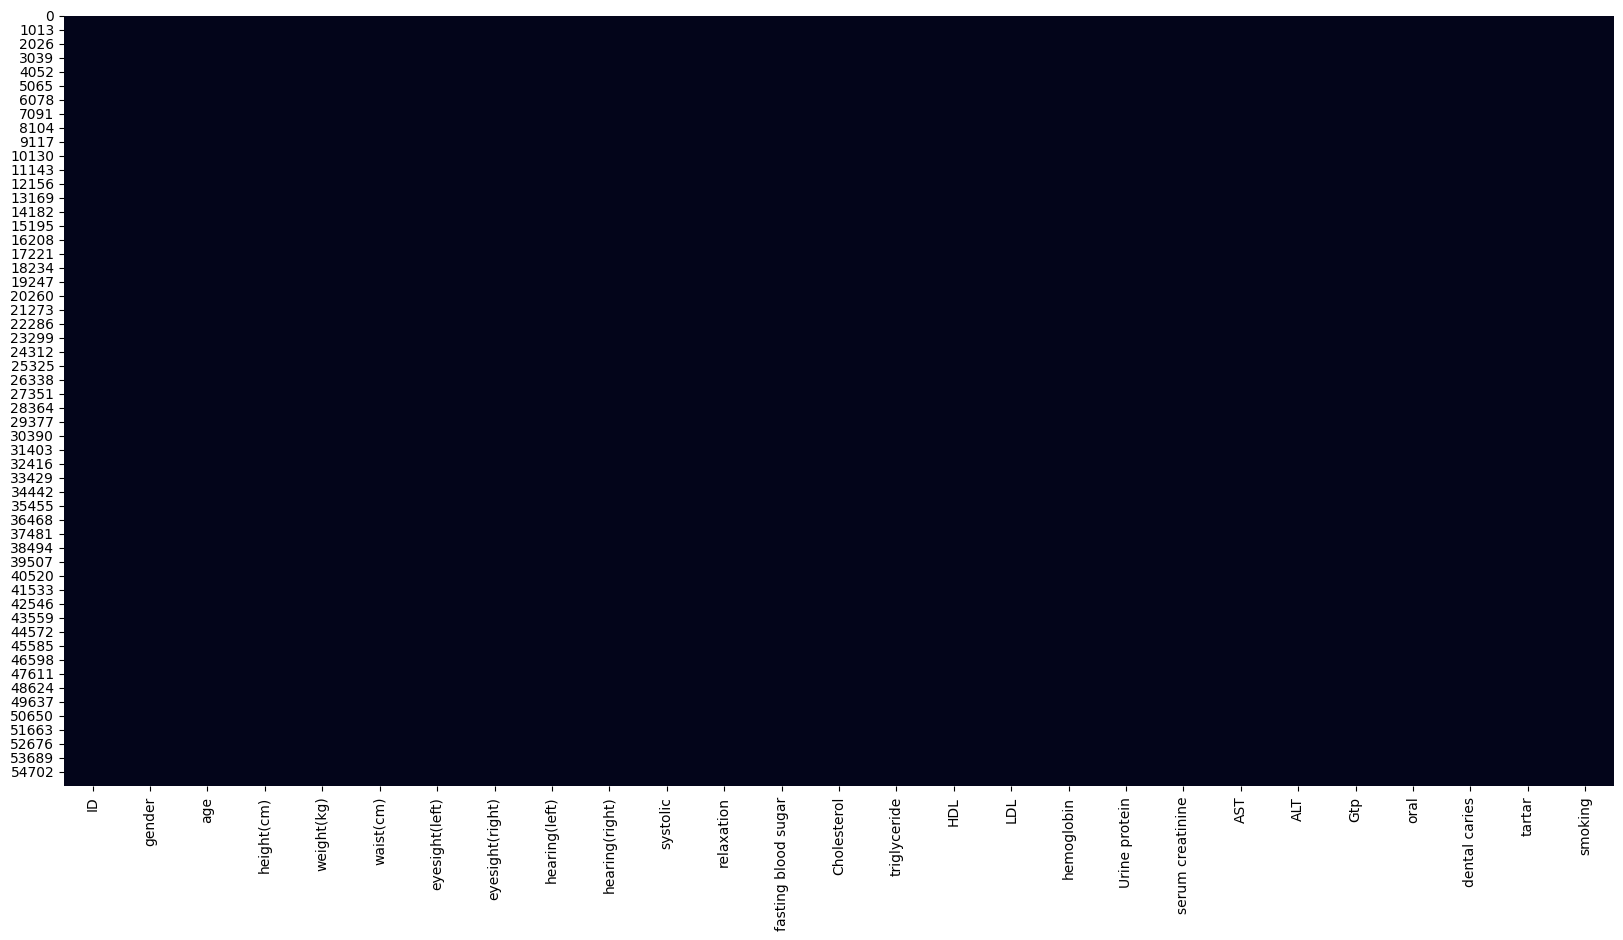

In [72]:
plt.figure(figsize = (20,10))
sns.heatmap(df.isna(), cbar = False)

Notre  dataset ne contient aucune valeur manquante.
Ce qui est une tres bonne nouvelle car on aura pas a nettoyer nos donnees

<div style="width: 90%; margin: auto; background-color: #274d3e; padding: 20px; border-radius: 0 12px 12px 12px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.3); color: #ffffff; text-align: center; font-style: italic;" markdown="1">
    <span style="font-style: italic; font-size: 30px; font-weight: bold; ">DATA VISUALIZATION</span>
</div>

   ##                                             Data Cleaning
   
  Notre dataset etant deja "propre", on va juste eliminer la variable "ID" qui n'est pas utile

In [73]:
df.drop(columns=['ID'], axis =1,inplace=True)


## Analyse de la variable target

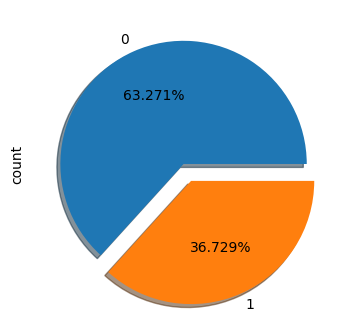

In [74]:
plt.figure(figsize = [7, 4], clear = True)
df["smoking"].value_counts().plot.pie(explode = [0, 0.15], autopct = '%1.3f%%', shadow = True);


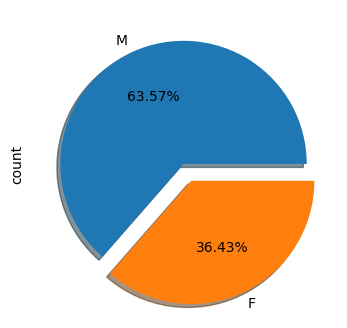

In [75]:
plt.figure(figsize = [7, 4], clear = True)
df["gender"].value_counts().plot.pie(explode = [0, 0.15], autopct = '%1.2f%%', shadow = True);

Il y'a plus d'échantillon male que femelle dans cette dataset

Il y'a 63.2% de fumeurs et 36.7% de non fumeurs . Les donées de la target sont désequilibrés ( Unbalanced dataset )

In [76]:
# identification des features numeriques et categoriel

numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes('object').columns.tolist()

## Distribution des varaiables numeriques  ( signification des donnees)

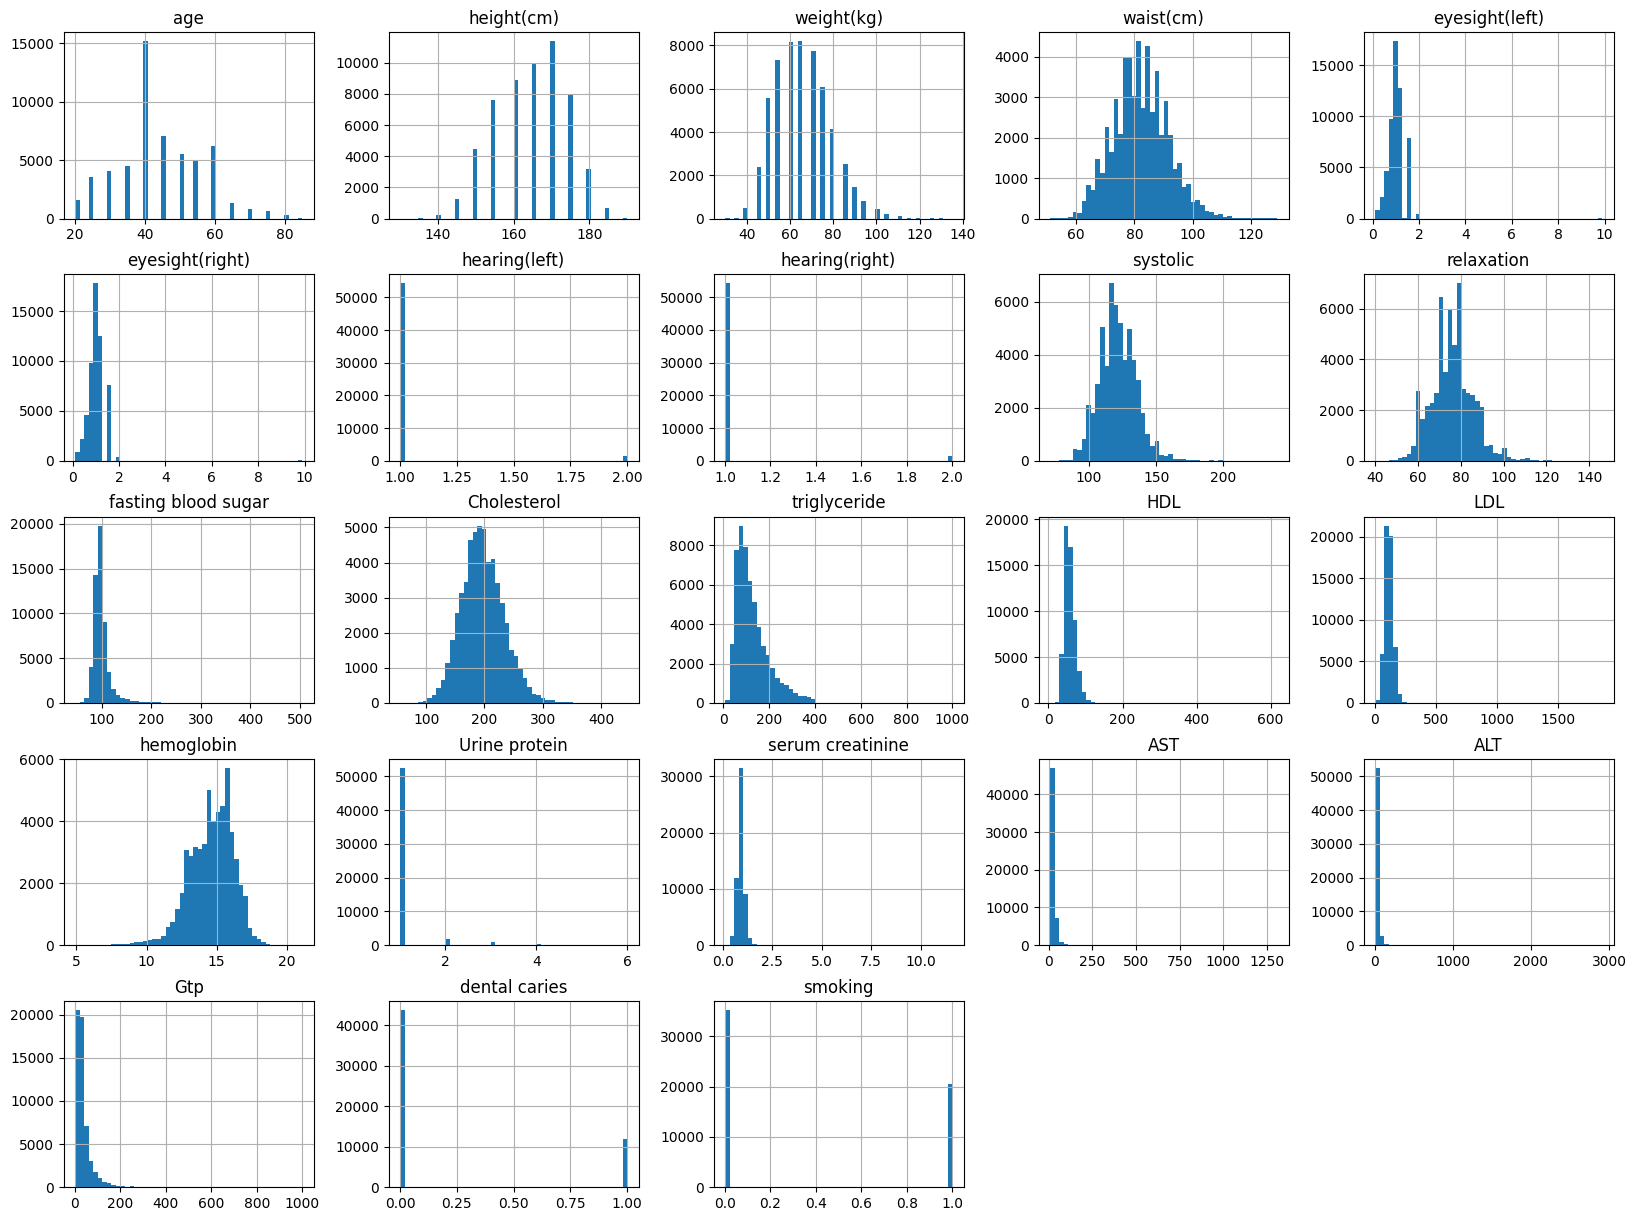

In [77]:
df.hist(bins=50,figsize=(20,15))
plt.show()


nous overvons une distribution normale et asymetrique dans les donnees.
les donnees ne sont pas centre en 0 ce qui montre qu'elle ne sont pas normalisees.



 # Anslyse des relations entre les variables

# Relation target/age

<Axes: xlabel='age', ylabel='count'>

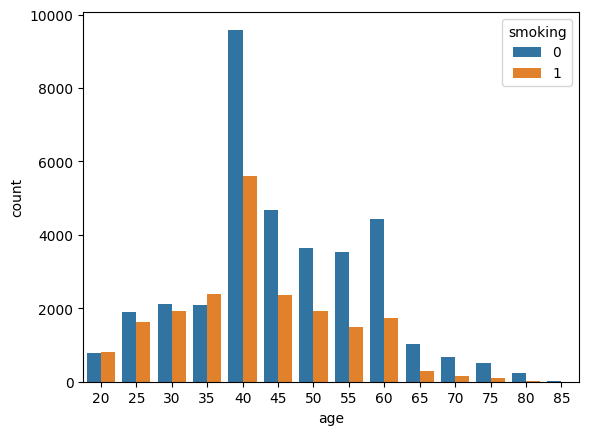

In [78]:
sns.countplot(x = "age", hue = "smoking",data=df)

l semble que l'age ne permet pas de savoir si une personne fume ou pas 

# Relation target/tarter , dental caries

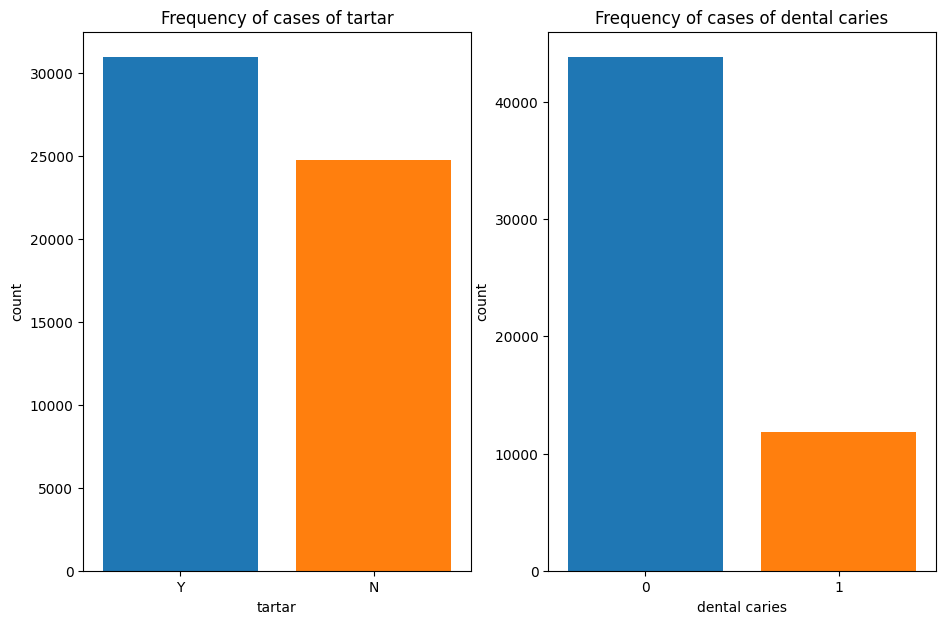

In [79]:
fig, axes = plt.subplots(1, 2, figsize = (11, 7))
axes = axes.flatten()


sns.barplot(ax = axes[0],
            x = df["tartar"].value_counts().index,
            y = df["tartar"].value_counts(),
            data = df, saturation = 1).set(title = "Frequency of cases of tartar");

sns.barplot(ax = axes[1],
            x = df["dental caries"].value_counts().index,
            y = df["dental caries"].value_counts(),
            data = df, saturation = 1).set(title = "Frequency of cases of dental caries");

On remarque bien qu'il y'a plus d'accumulation de bactéries dans les dents et des caries dentaires chez les fumeurs que les non fumeurs .

On prévoit que les variables 'tartar' et 'dental caries' seront des facteurs décisives et important pour le modèle de classification   

## Corelation entre les les differentes variables

<Axes: >

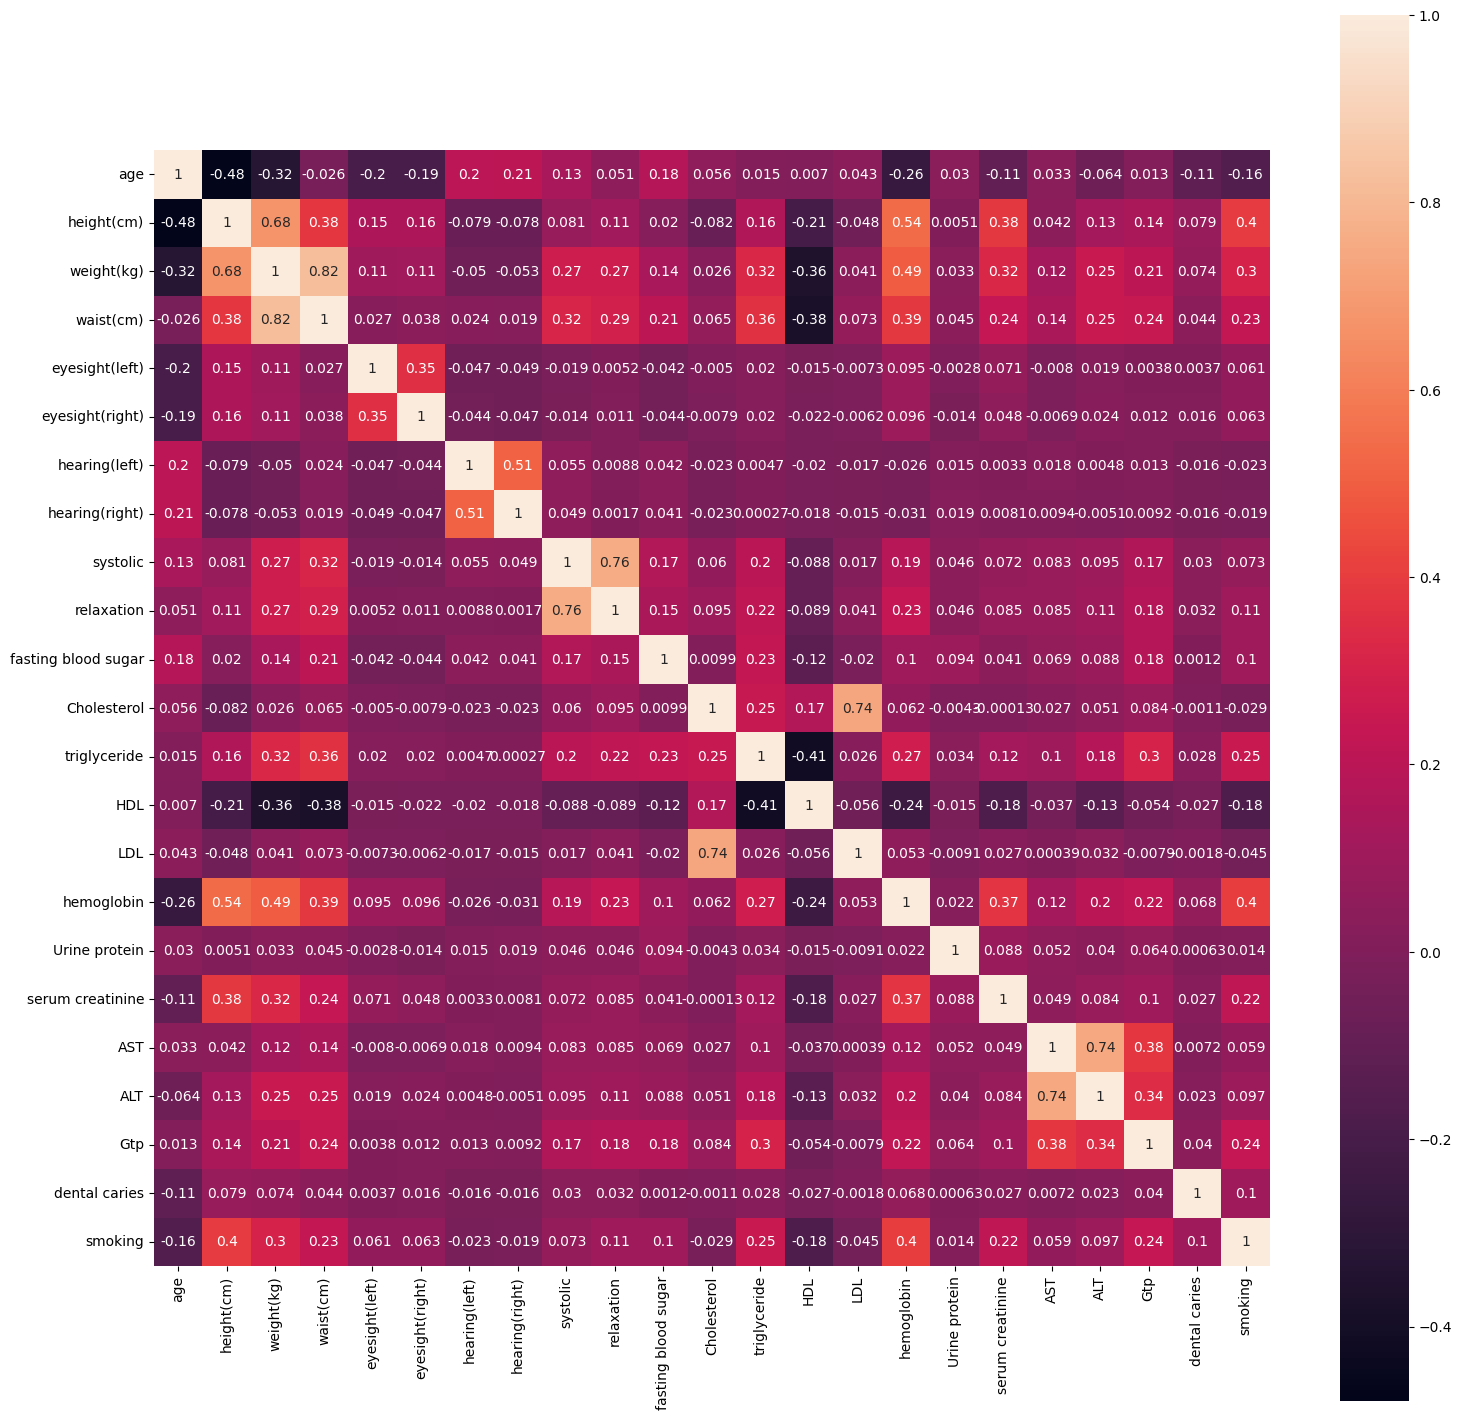

In [80]:
df_corr = df[numeric_cols].corr()
plt.subplots(figsize=(18,18))
sns.heatmap(df_corr,annot=True, square=True)

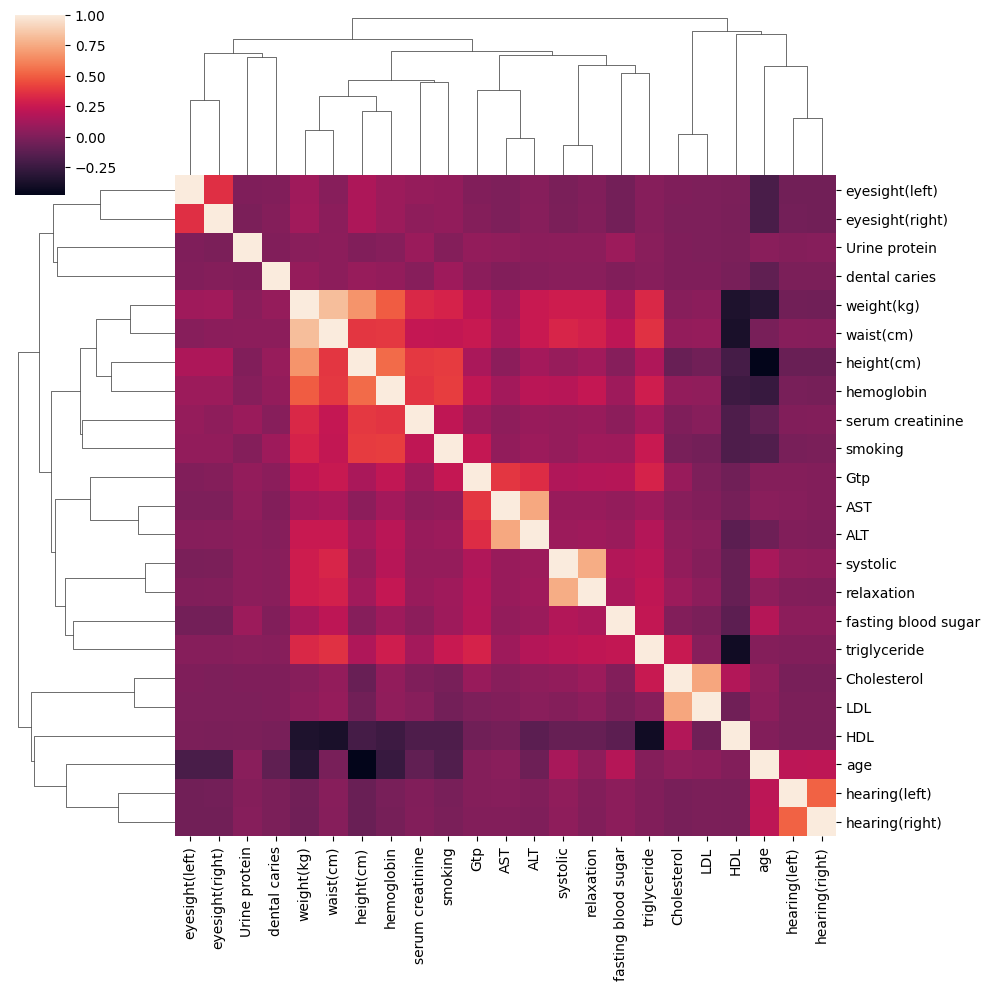

In [81]:
sns.clustermap(df_corr)

on observe des correlations entre certains variales
les variales "weight" et "waist" sont les plus corrélées dans la dataset . 

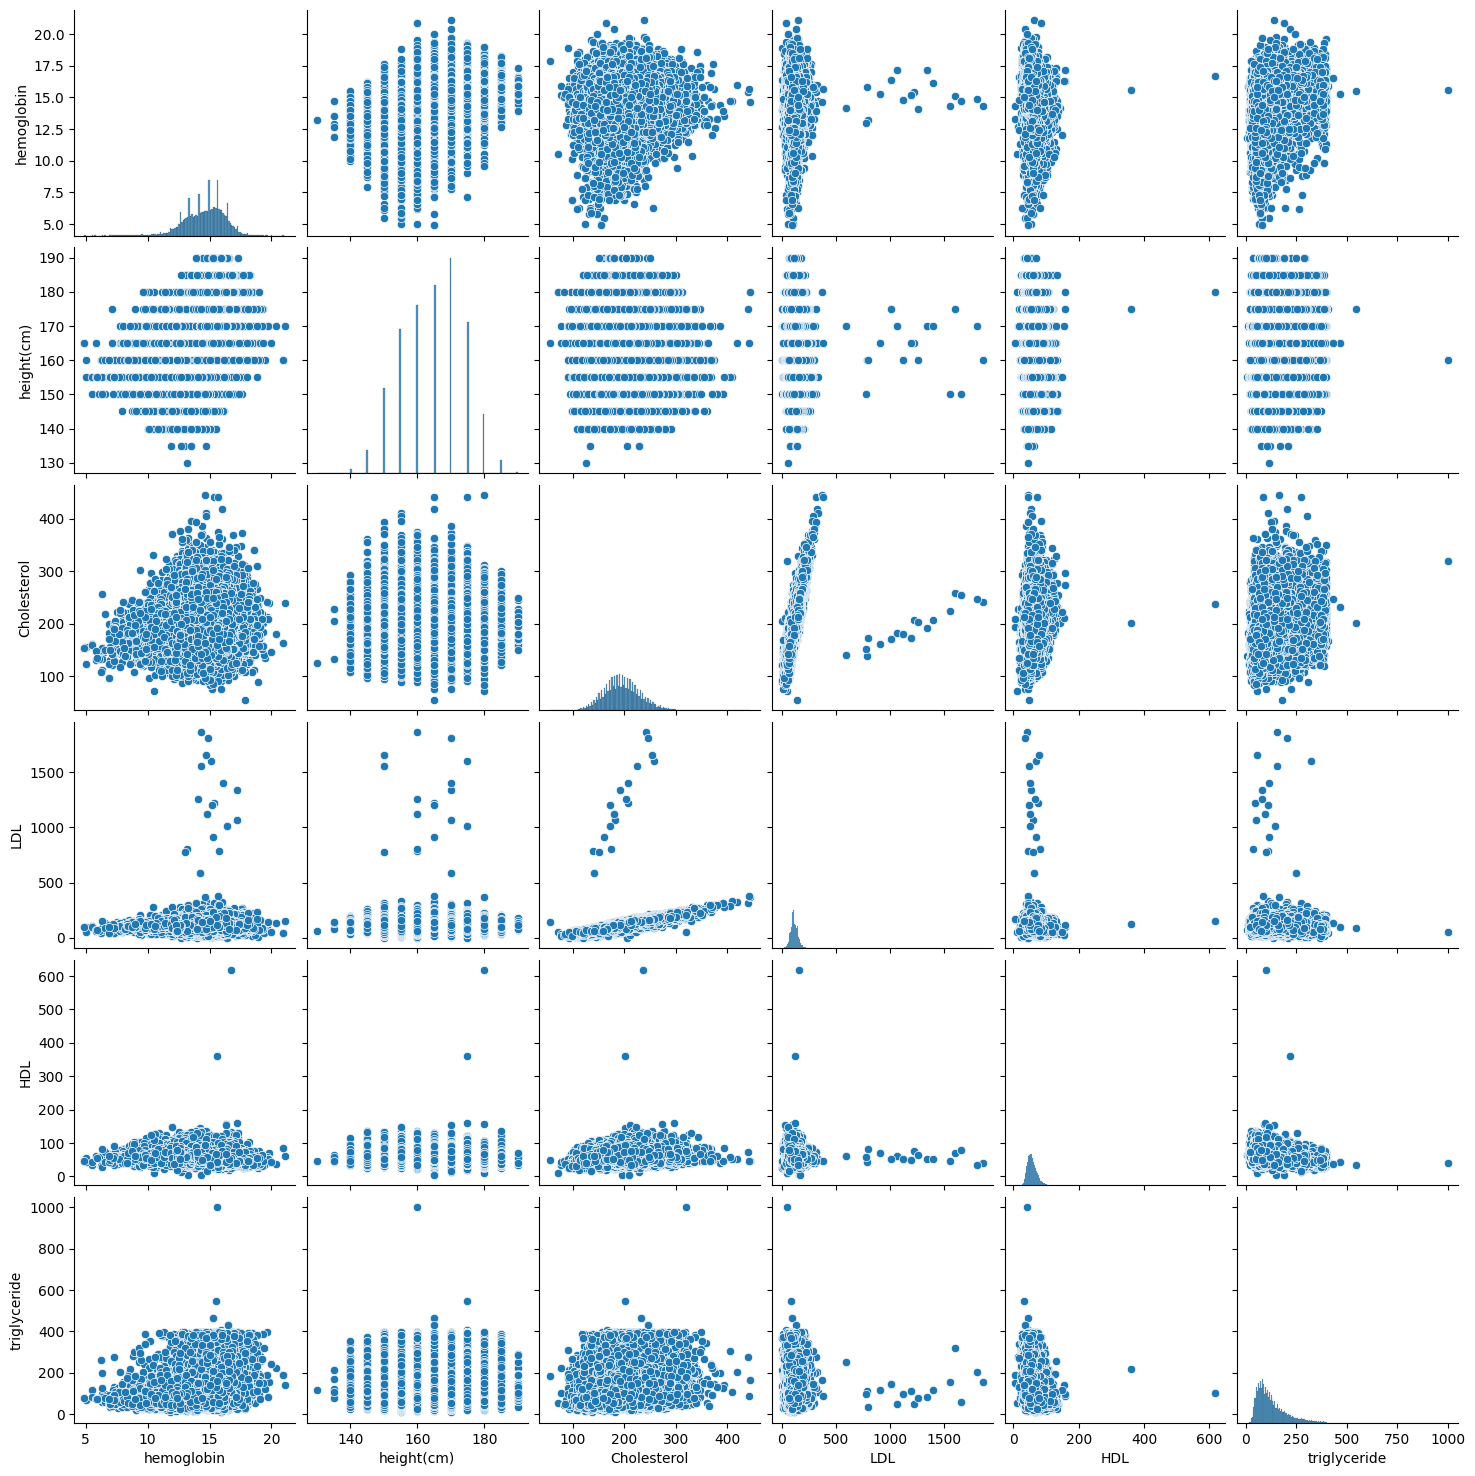

In [82]:
features_to_explore = ['hemoglobin','height(cm)','Cholesterol','LDL','HDL','triglyceride']
selected_features_df = df[features_to_explore]

sns.pairplot(selected_features_df)
plt.show()

## Relation entre weight(kg)/ autres variable

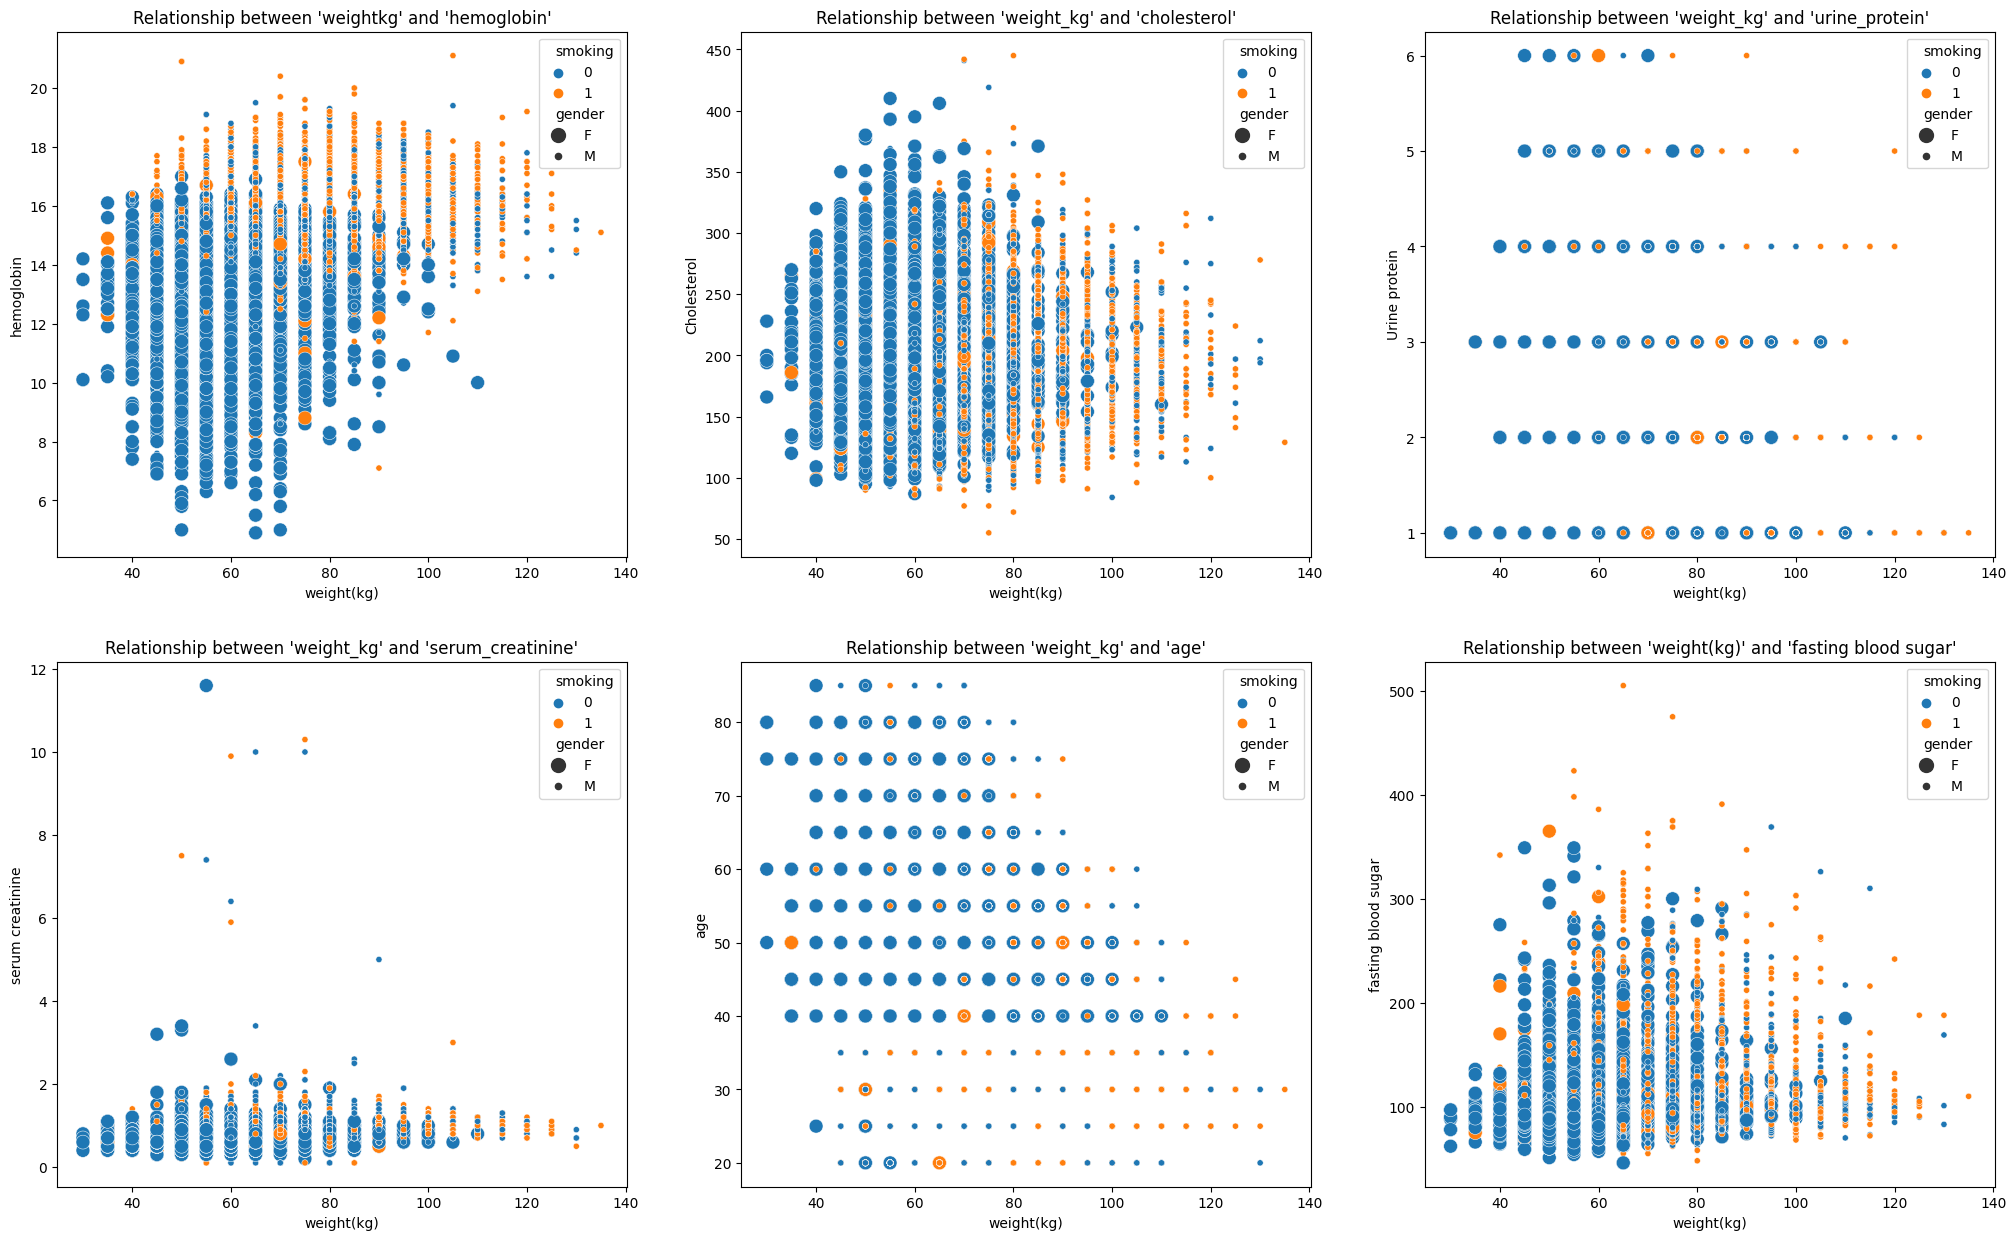

In [83]:
fig, axes = plt.subplots(2, 3, figsize = (25, 15))
axes = axes.flatten()

sns.scatterplot(ax = axes[0], x = "weight(kg)", y = "hemoglobin", hue = "smoking", size = "gender", sizes = (20, 100), legend="full",
                data = df).set(title = "Relationship between 'weightkg' and 'hemoglobin'");


sns.scatterplot(ax = axes[1], x = "weight(kg)", y = "Cholesterol", hue = "smoking", size = "gender", sizes=(20, 100), legend="full",
                data = df).set(title = "Relationship between 'weight_kg' and 'cholesterol'");


sns.scatterplot(ax = axes[2], x = "weight(kg)", y = "Urine protein", hue = "smoking", size = "gender", sizes=(20, 100), legend="full",
                data = df).set(title = "Relationship between 'weight_kg' and 'urine_protein'");


sns.scatterplot(ax = axes[3], x = "weight(kg)", y = "serum creatinine", hue = "smoking", size = "gender", sizes=(20, 100), legend="full",
                data = df).set(title = "Relationship between 'weight_kg' and 'serum_creatinine'");


sns.scatterplot(ax = axes[4], x = "weight(kg)", y = "age", hue = "smoking", size = "gender", sizes=(20, 100), legend="full",
                data = df).set(title = "Relationship between 'weight_kg' and 'age'");


sns.scatterplot(ax = axes[5], x = "weight(kg)", y = "fasting blood sugar", hue = "smoking", size = "gender", sizes=(20, 100), legend="full",
                data = df).set(title = "Relationship between 'weight(kg)' and 'fasting blood sugar'");


Ces tracés nous permettent de vérifier qu'il est possible d'implémenter un modéle de classification qui sera performant car on arrive géneralement à distinguer les zones de couleurs (target) sur chaque graphe

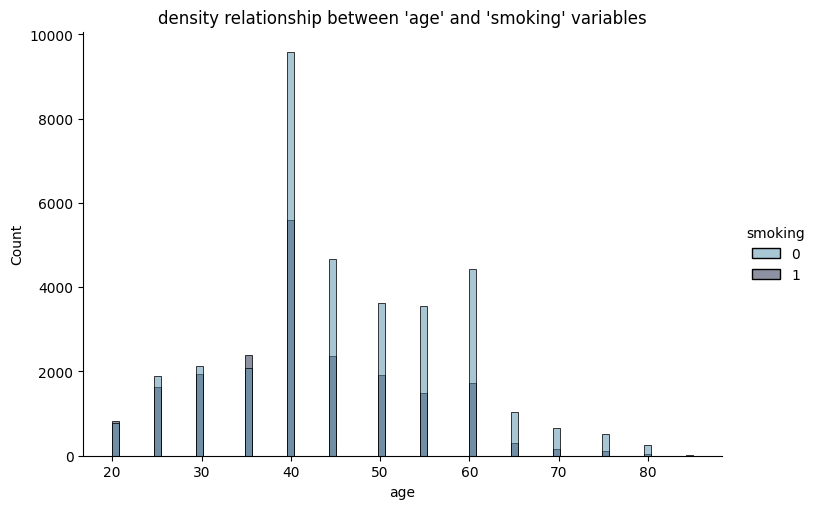

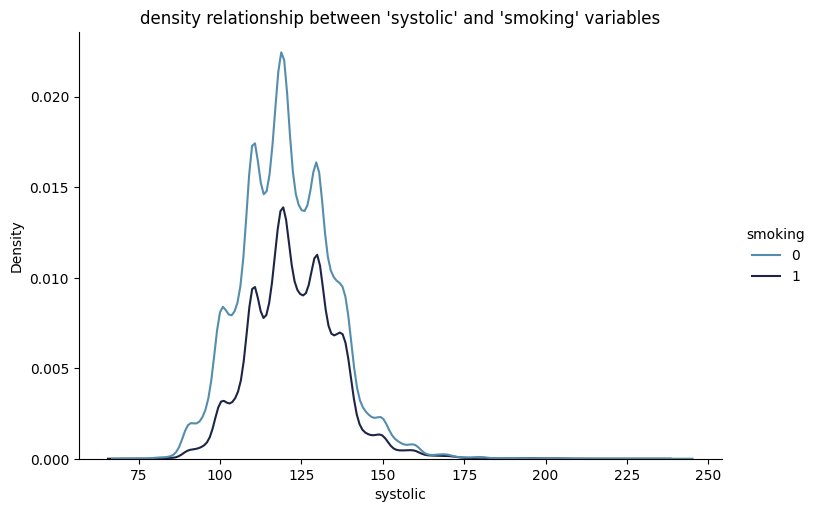

In [84]:
sns.displot(data = df, x = "age", hue = "smoking", kind = "hist", height = 5, aspect = 1.5,
    palette="ch:rot=-.25,hue=1,light=.50").set(title =  "density relationship between 'age' and 'smoking' variables");

sns.displot(data = df, x = "systolic", hue = "smoking", kind = "kde", height = 5, aspect = 1.5,
    palette="ch:rot=-.25,hue=1,light=.50").set(title = "density relationship between 'systolic' and 'smoking' variables");

Analyse par rapport à l'age :

- On remarque d'abord que pour toutes les tranches d'ages , il y'a plus de fumeurs que de non fumeurs 
- On arrive à détecter trois différents tranches ( clusters ) : Jeunes , adultes , vieux : Donc il serait possible d'affiner le modéle pour le permettre de cibler ces tranches la ( par exemple rajouter une colonne qui permet de spécifier ces tranches la et de lui donner un poids ou tronquer la dataset et établir un modéle sur chaque tranche ) 

Analyse par rapport à systolic ( pression artérielle ) :

- On remarque un écart considérable des valeurs de pression entre les fumeurs et les non fumeurs : Donc , on prévoit que ce feature serait décisive et important pour la classification .


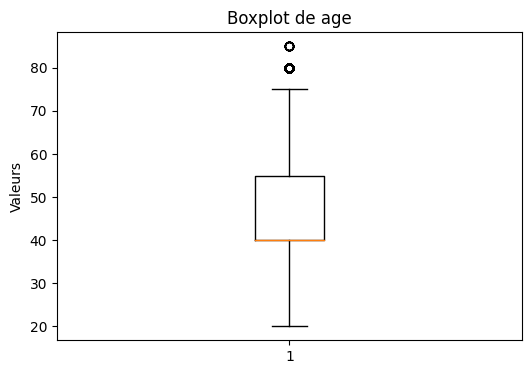

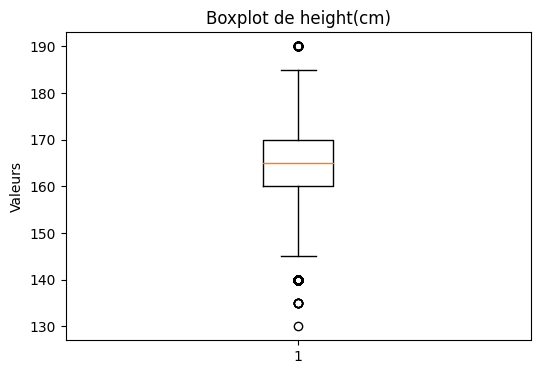

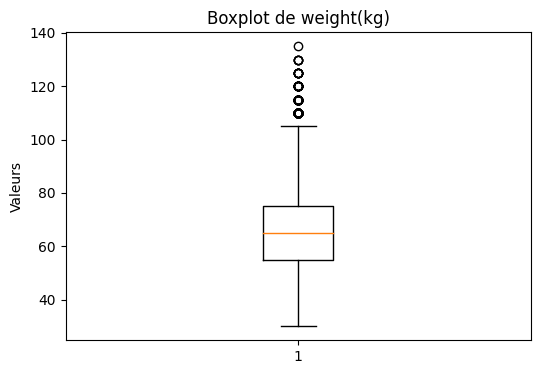

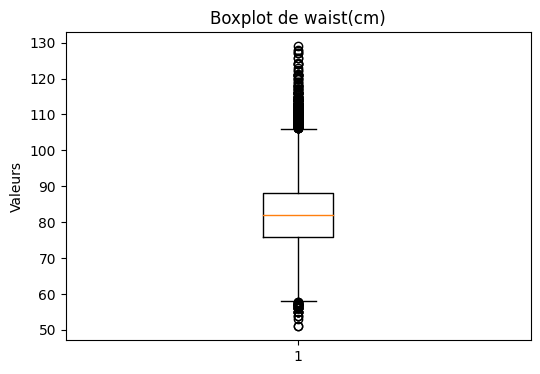

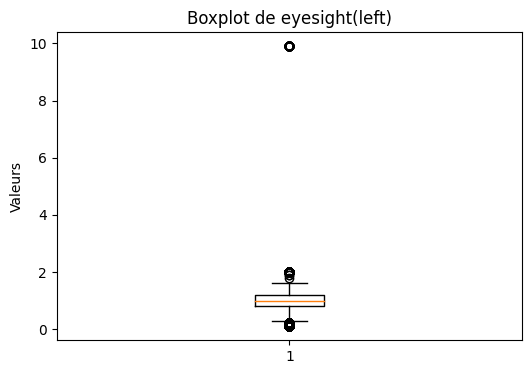

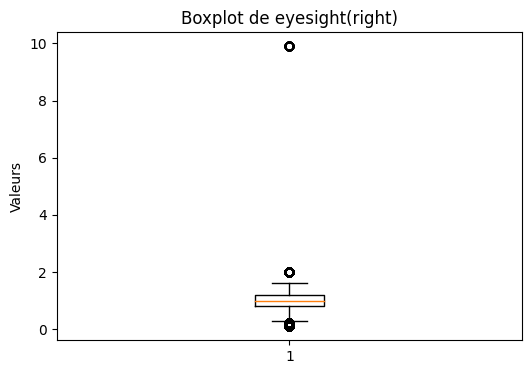

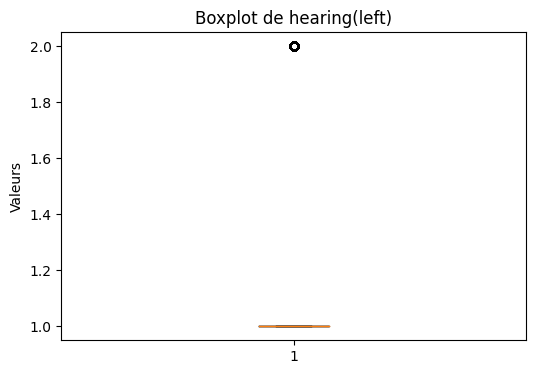

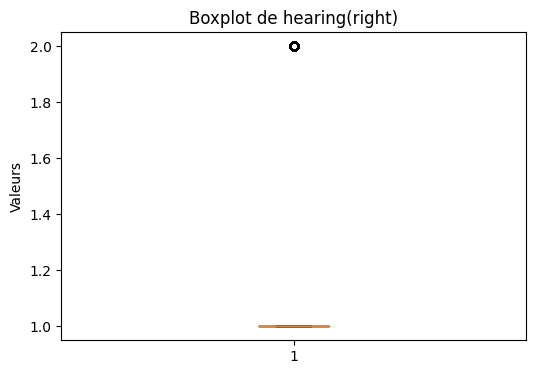

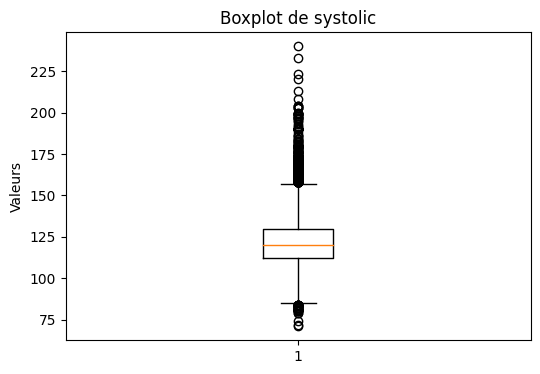

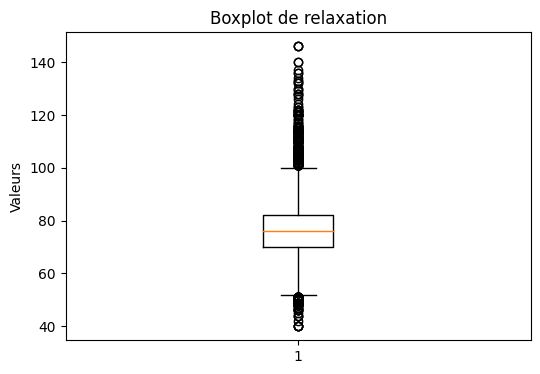

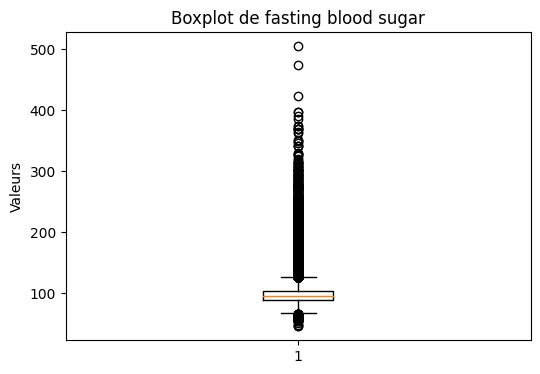

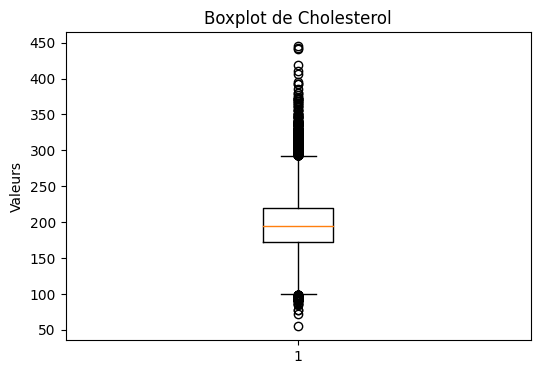

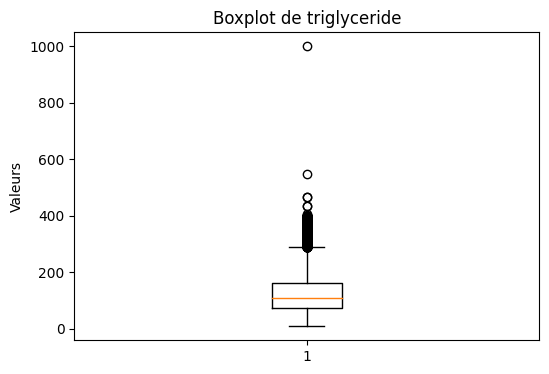

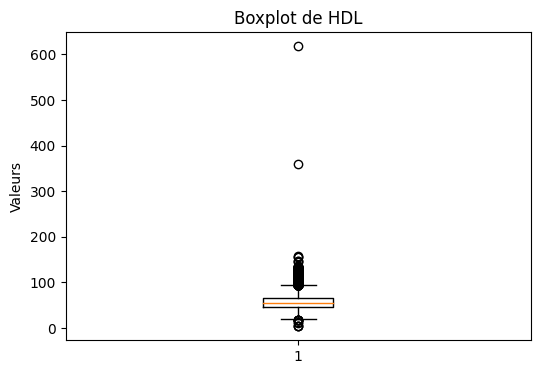

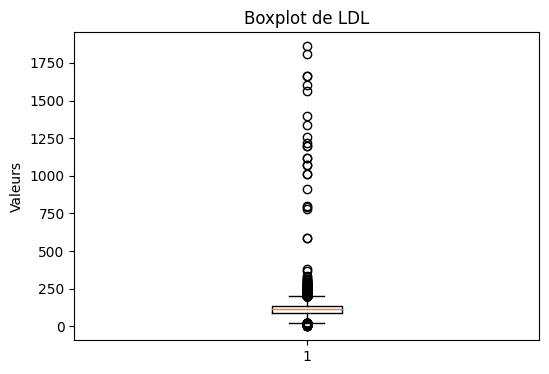

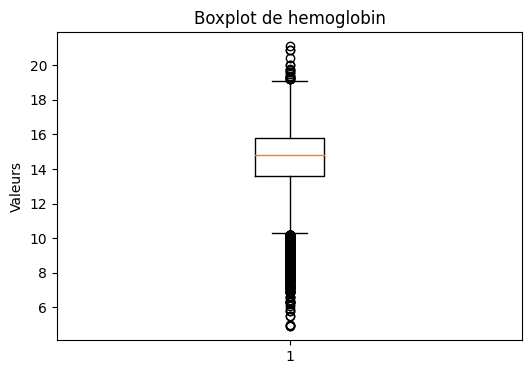

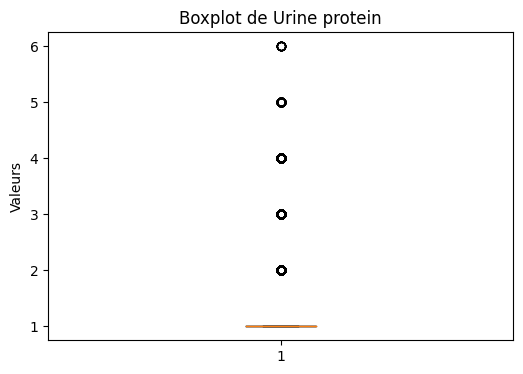

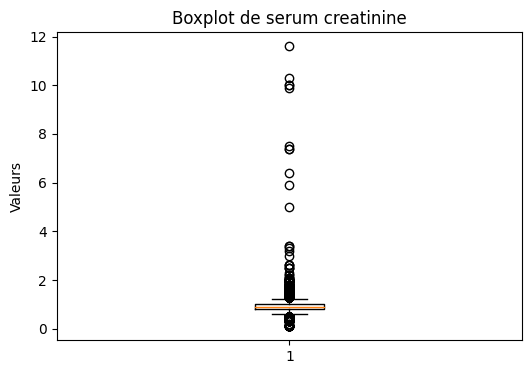

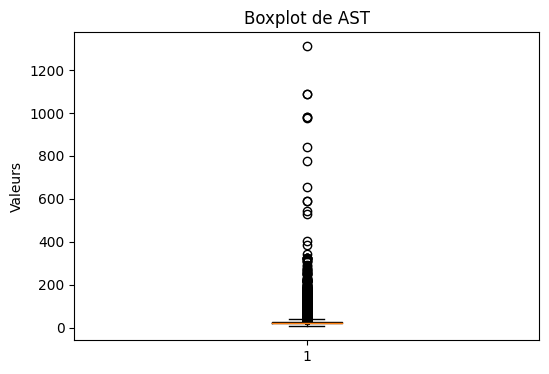

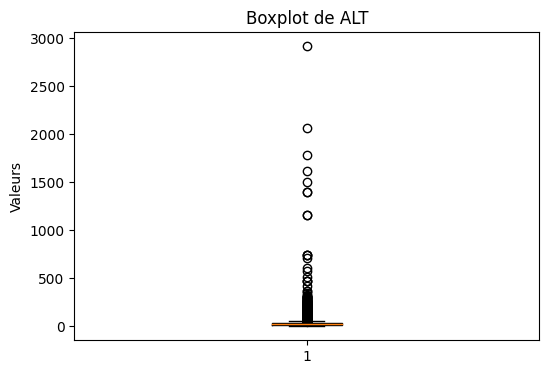

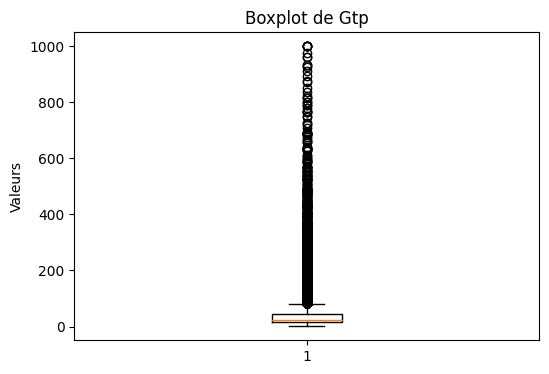

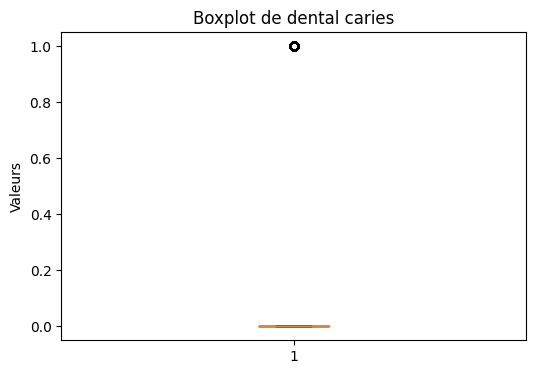

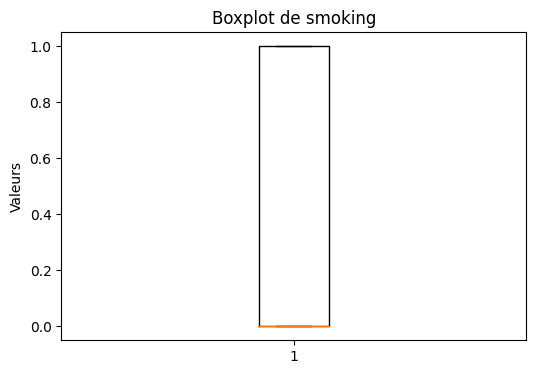

In [85]:
for column in numeric_cols:
    plt.figure(figsize=(6, 4))
    plt.boxplot(df[column])
    plt.title(f'Boxplot de {column}')
    plt.ylabel('Valeurs')
    plt.show()

On remarque des outliers dans nos donnees qu'il va faloir detecter et suprimer dans la partie preprocessing

# Clusterisating des donnees
 
   ### Determinons le nombre de cluster

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

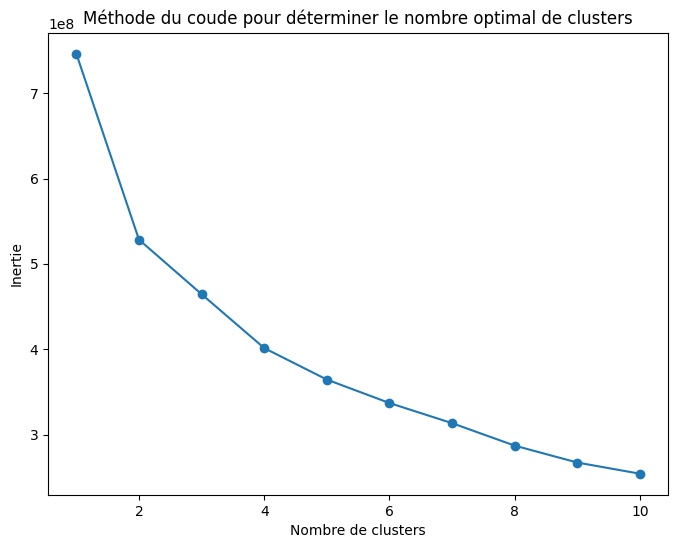

In [86]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df[numeric_cols])
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel("Inertie")
plt.title('Méthode du coude pour déterminer le nombre optimal de clusters')
plt.show()

On sait deja que le nombre de clusters sera égale à 2 car on est dans un cas de classification binaire . Cependant , on a preferé confirmer ca en utilisant la méthode du coude ( 'elbow' ) et on remarque une cohérence dans nos résultats

In [87]:
num_clusters = 2

kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(df[numeric_cols])

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

# Réduction de dimension avec PCA

In [88]:
pca = PCA(n_components=2)
reduced_df = pca.fit_transform(df[numeric_cols])

Déterminons le nombre de dimensions optimal 

Text(0, 0.5, 'cumulative explained variance')

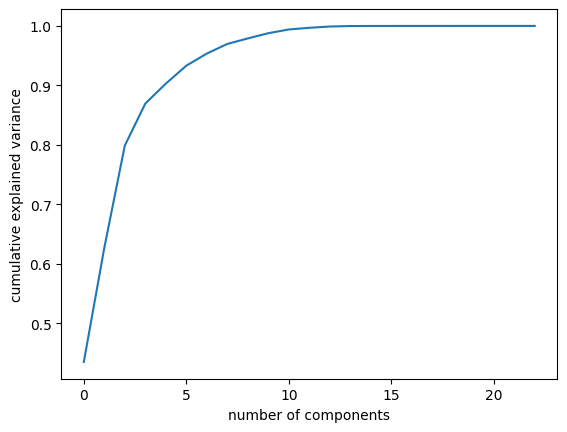

In [89]:
pca = PCA().fit(df[numeric_cols])
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [90]:
d = np.argmax(cumsum >= 0.95) + 1
d

7

Pour préserver plus de 95% de richesse , une base de 7 élements est nécessaire 

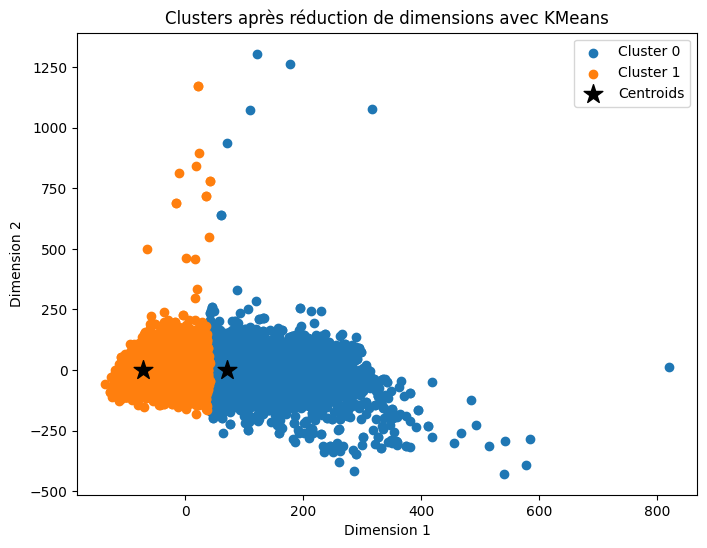

In [91]:
plt.figure(figsize=(8, 6))
for cluster in range(num_clusters):
    plt.scatter(reduced_df[kmeans.labels_ == cluster][:, 0], reduced_df[kmeans.labels_ == cluster][:, 1], label=f'Cluster {cluster}')

centroids = kmeans.cluster_centers_
transformed_clusters = pca.fit_transform(centroids)


plt.scatter(transformed_clusters[:, 0], transformed_clusters[:, 1], marker='*', s=200, c='black', label='Centroids')
plt.title('Clusters après réduction de dimensions avec KMeans')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

Avec une préservation de 80% de richesse (2 dimensions) , ce qui est acceptable , on arrive à bien distinguer les clusters .
Nos données sont donc prés à etre utilisés pour les modéles de ML

<div style="width: 90%; margin: auto; background-color:  #274d3e; padding: 20px; border-radius: 0 12px 12px 12px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.3); color: #ffffff; text-align: center; font-style: italic;" markdown="1">
    <span style="font-style: italic; font-size: 30px; font-weight: bold; ">DATA PROCESSING</span>
</div>

# Détection et élimination d'outliers

In [92]:
from collections import Counter
import numpy as np

def outlier_detection(df, n, columns):
    rows = []
    will_drop_train = []
    for col in columns:
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_point = 1.5 * IQR
        rows.extend(df[(df[col] < Q1 - outlier_point)|(df[col] > Q3 + outlier_point)].index)
    for r, c in Counter(rows).items():
        if c >= n:
            will_drop_train.append(r)
    return will_drop_train

will_drop_train = outlier_detection(df, 5, df.select_dtypes(["float", "int"]).columns)
will_drop_train[0:4]

[44, 3368, 3592, 4171]

In [93]:
df.drop(will_drop_train, inplace = True, axis = 0)

# Encodage
Transformation de données catégoriques en valeurs numériques avec LabelEncoder

In [94]:
lbe = LabelEncoder()
lbe.fit_transform(df["gender"])
df["gender"] = lbe.fit_transform(df["gender"])

lbe = LabelEncoder()
lbe.fit_transform(df["tartar"])
df["tartar"] = lbe.fit_transform(df["tartar"])

lbe = LabelEncoder()
lbe.fit_transform(df["oral"])
df["oral"] = lbe.fit_transform(df["oral"])

### separation de la target et des features

In [95]:
#target
y = df["smoking"]

#features
x = df.drop("smoking", axis = 1)

### Division des données en données d'entrainement ( train_set ) et données de test (test_set)

In [96]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.10,
                                                    shuffle = True,
                                                    random_state = 1)

### Normalisation des données avec MinMaxScaler

In [97]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

<div style="width: 90%; margin: auto; background-color:  #274d3e; padding: 20px; border-radius: 0 12px 12px 12px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.3); color: #ffffff; text-align: center; font-style: italic;" markdown="1">
    <span style="font-style: italic; font-size: 30px; font-weight: bold; ">BUILDING CLASSIFICATION MODELS</span>
</div>

# RandomForestClassifier

In [98]:
rf_model = RandomForestClassifier(n_estimators = 2000)
rf_model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=2000)

In [99]:
y_pred = rf_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.843681917211329